# <font color = blue >Exercícios da Aula 03 - Histogramas e Limiarização </font>
### Samuel Felipe dos Santos

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import exp
import os
from sklearn.preprocessing import normalize

### Ex 1:

● Implemente a operação de correlação e procure a posição mais semelhante que uma determinada janela ocorre dentro de uma imagem grande.

In [2]:
def pad(image, u,d,l,r):
    paded_image = np.zeros([image.shape[0]+u+d, image.shape[1]+l+r])
    paded_image[u:paded_image.shape[0]-d, l:paded_image.shape[1]-r] = image
    return paded_image

def correlation(image, mask):
    mask_u = int(mask.shape[0]/2)
    mask_d = mask.shape[0]-1-mask_u
    mask_l = int(mask.shape[1]/2)
    mask_r = mask.shape[1]-1-mask_l
    
    img_shape = image.shape
    p_image = pad(image, mask_u, mask_d, mask_l, mask_r)
    
    out = np.zeros(img_shape[:2])
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            out[i,j] = np.sum( mask *  p_image[ i:i + mask.shape[0], j:j + mask.shape[1]])
    return out

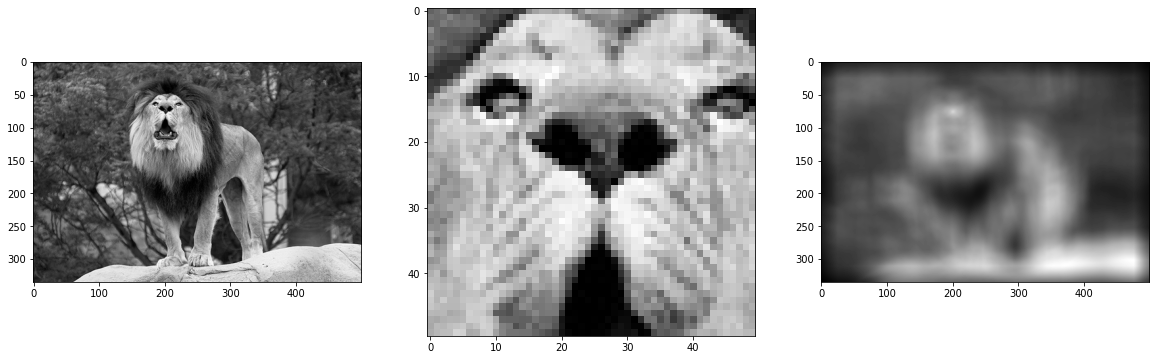

In [3]:
grayimg = cv.imread('lion.jpg', 0)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(grayimg, cmap='gray')

msk_windown_i = [50,100]
msk_windown_j = [175,225]

msk = grayimg[msk_windown_i[0]:msk_windown_i[1], msk_windown_j[0]:msk_windown_j[1]]
fig.add_subplot(1, 3, 2)
plt.imshow(msk, cmap='gray')

correlation_img_msk = correlation(grayimg, msk)
fig.add_subplot(1, 3, 3)
plt.imshow(correlation_img_msk, cmap='gray')

max center: (302, 474)
max_windown: [277, 327] [449, 499]
msk_windown: [50, 100] [175, 225]
265805
312978


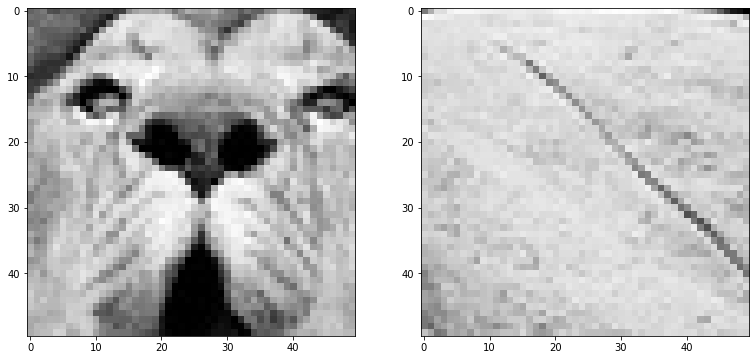

In [4]:
max_center = np.unravel_index(correlation_img_msk.argmax() , correlation_img_msk.shape)
max_windown_i = [ max_center[0]-25,max_center[0]+25]
max_windown_j = [ max_center[1]-25,max_center[1]+25]
print('max center:', max_center)
print('max_windown:', max_windown_i, max_windown_j)
print('msk_windown:', msk_windown_i, msk_windown_j)

print(np.sum(msk*msk))
print(np.sum(msk* grayimg[max_windown_i[0]:max_windown_i[1], max_windown_j[0]:max_windown_j[1] ]))

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(msk, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(grayimg[max_windown_i[0]:max_windown_i[1], max_windown_j[0]:max_windown_j[1]], cmap='gray')

In [58]:
def rescale(img, img_min, img_max):
    mn = img.min()
    mx = img.max()
    return ((img-mn)/(mx-mn)*(img_max-img_min) + img_min)

def standardize(img, mean, std):
    return (img-mean)/std

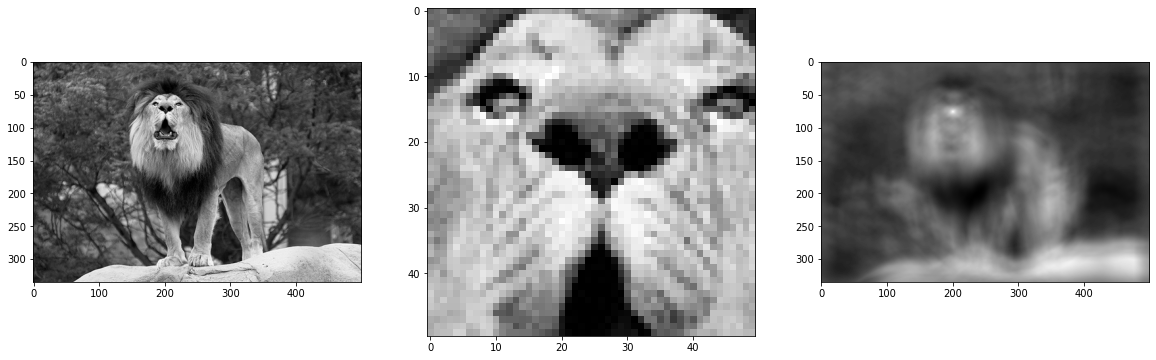

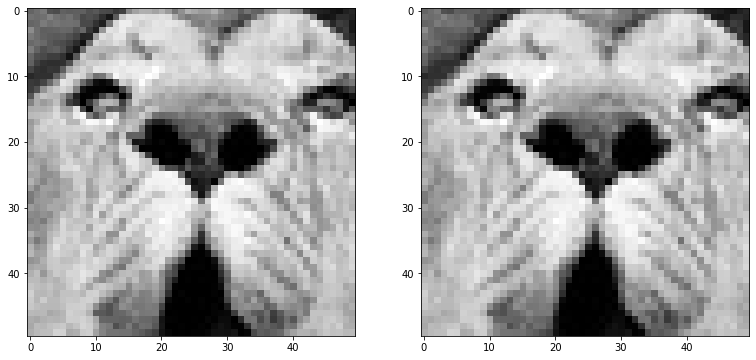

In [72]:
grayimg = cv.imread('lion.jpg', 0)
n_img = rescale(n_img, 0, 255).astype('uint8')
n_img = standardize(n_img, n_img.mean(), n_img.std())

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(n_img, cmap='gray')

n_msk = n_img[msk_windown_i[0]:msk_windown_i[1], msk_windown_j[0]:msk_windown_j[1]]
fig.add_subplot(1, 3, 2)
plt.imshow(n_msk, cmap='gray')

co_img_msk_normalized = correlation(n_img, n_msk)
fig.add_subplot(1, 3, 3)
plt.imshow(co_img_msk_normalized, cmap='gray')

max_center = np.unravel_index(co_img_msk_normalized.argmax() , co_img_msk_normalized.shape)
max_windown_i = [ max_center[0]-25,max_center[0]+25]
max_windown_j = [ max_center[1]-25,max_center[1]+25]

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(n_msk, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(n_img[max_windown_i[0]:max_windown_i[1], max_windown_j[0]:max_windown_j[1]], cmap='gray')

### Ex 2:

● Pesquise e implemente o filtro de suavização
gaussiano

● Baixe a base de imagens de células do link
abaixo. Depois tente fazer limiarizações para
separar as células do fundo

– http://www.cellimagelibrary.org/pages/project_20269

● Tente usar filtros de suavização para melhorar os
resultados e deixar as células com o mínimo de
componentes possíveis.

In [31]:
def gaussian_kernel(shape, std):
    center = [int(shape[0]/2),int(shape[0]/2)]
    out = np.zeros(shape[:2])
    for i in range(shape[0]):
        for j in range(shape[1]):
            out[i,j] = (1.0/(2.0*pi*std**2))*exp(-(((i-center[0])**2 + (j-center[1])**2 )/(2.0*std**2)))
    return out

In [73]:
images = []

for img_path in os.listdir('BBBC022_v1_images_20585w1')[0:6]:
    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    images += [img]

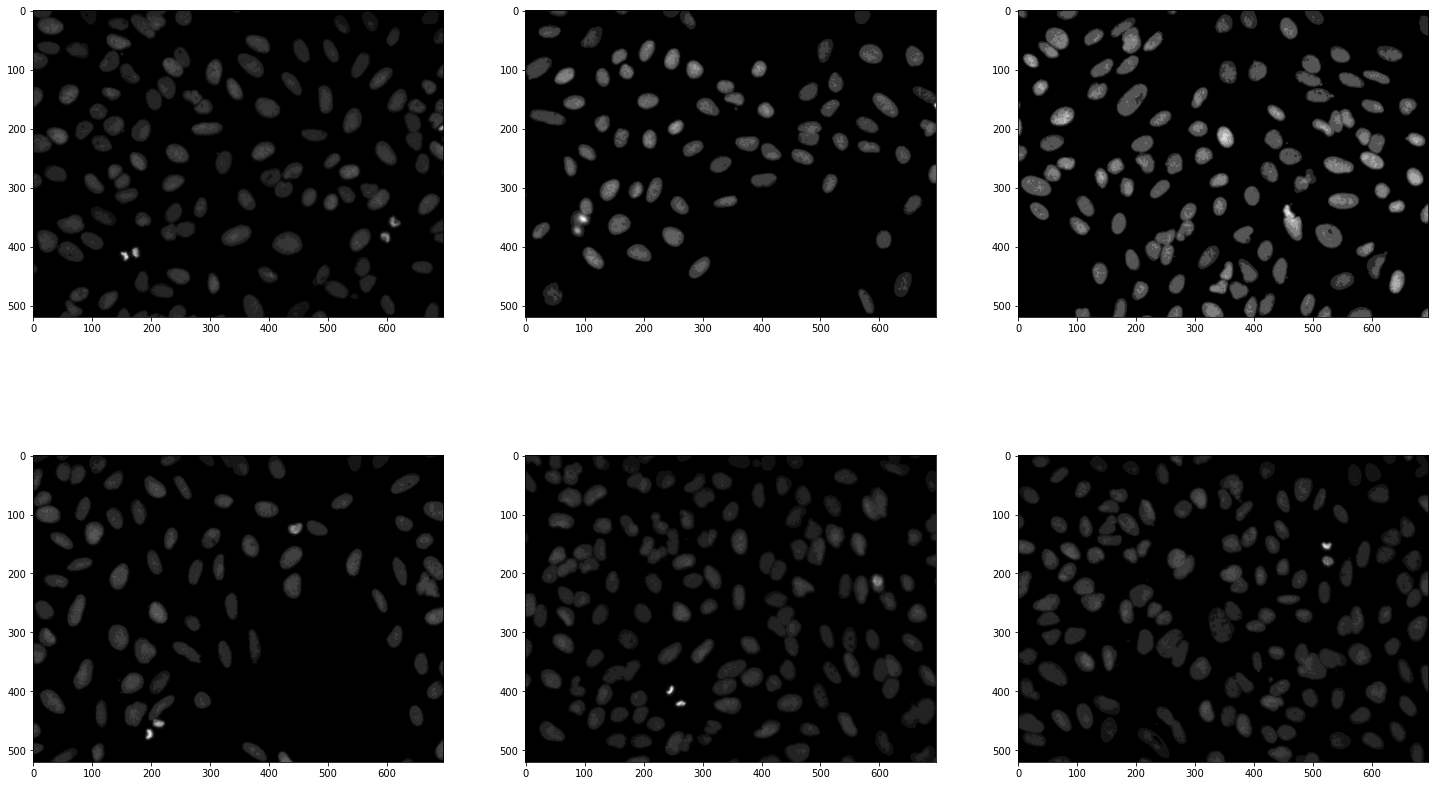

In [78]:
np_imgs = np.array(images)
imgs_mean = np_imgs.mean()
imgs_std = np_imgs.std()

fig = plt.figure(figsize=(25, 15))
i=1
for img in images:
    img = standardize(img, imgs_mean, imgs_std)
    img = rescale(img, 0, 255)
    fig.add_subplot(2, 3, i)
    plt.imshow(img, cmap='gray')
    i+=1

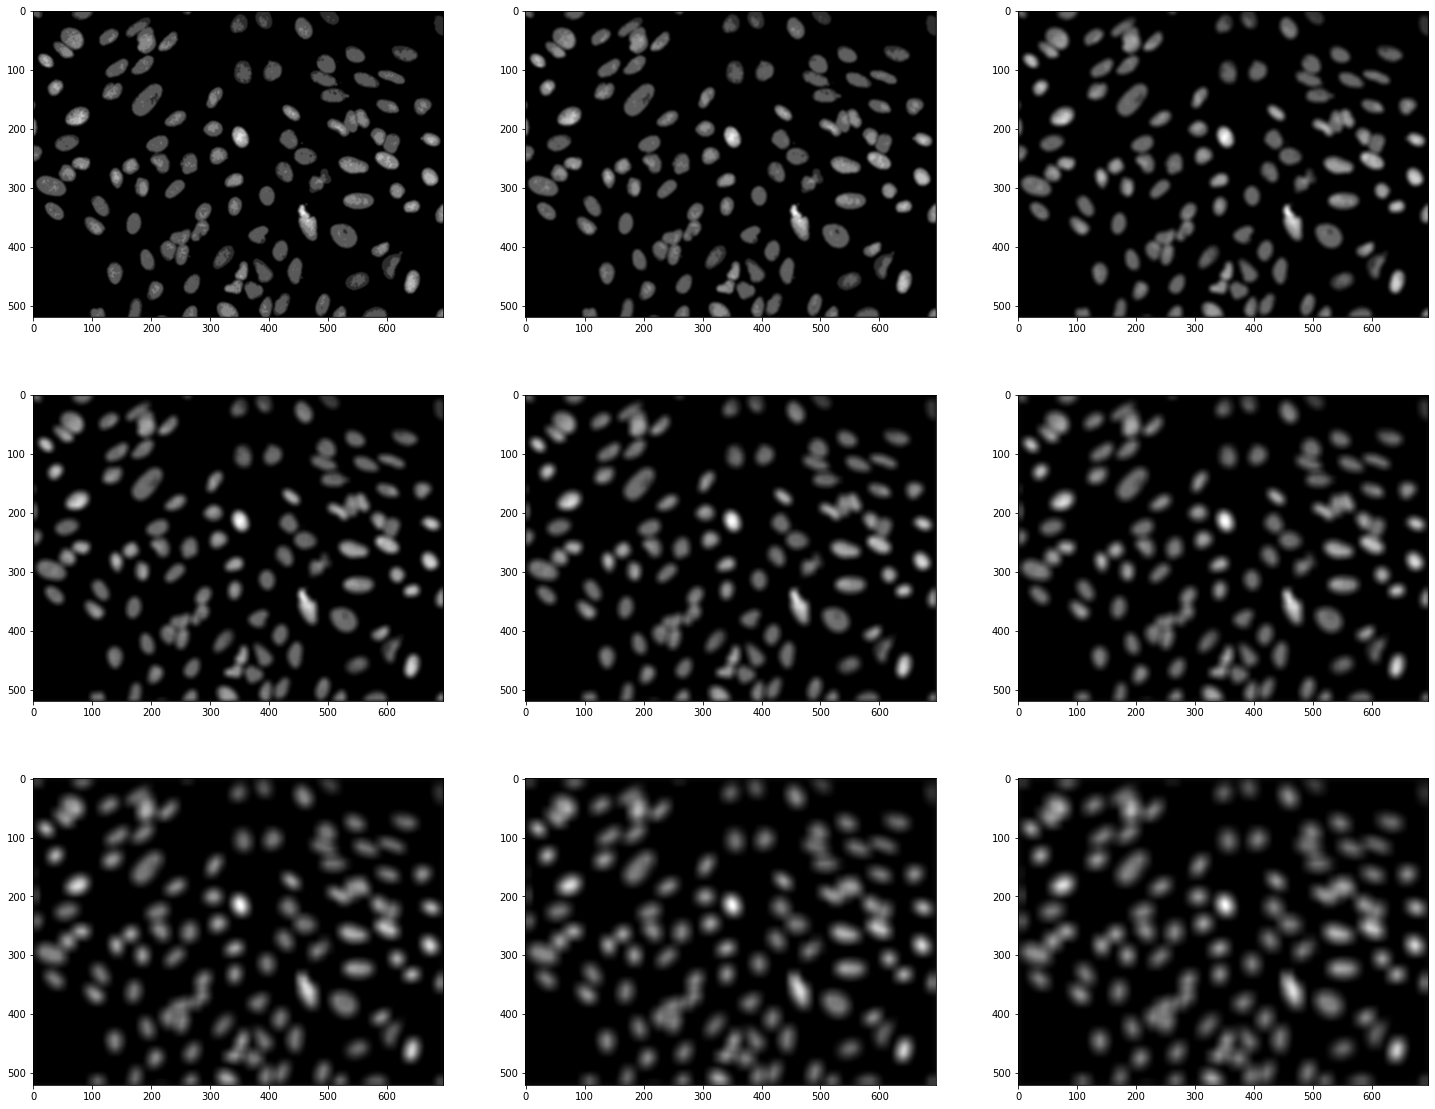

In [85]:
filters = []

std = 868.8
for kernel_size in [[3,3],[5,5],[9,9],[11,11],[13,13],[15,15],[19,19],[21,21],[23,23]]:
    filters += [gaussian_kernel(kernel_size, std)]

fig = plt.figure(figsize=(25, 20))
i=1
img = images[2]

for msk in filters:
    smooth_img = standardize(img, imgs_mean, imgs_std)
    smooth_img = correlation(smooth_img, msk )
    smooth_img = reescale( smooth_img, 0, 255)
    fig.add_subplot(3, 3, i)
    plt.imshow(smooth_img, cmap='gray')
    i+=1

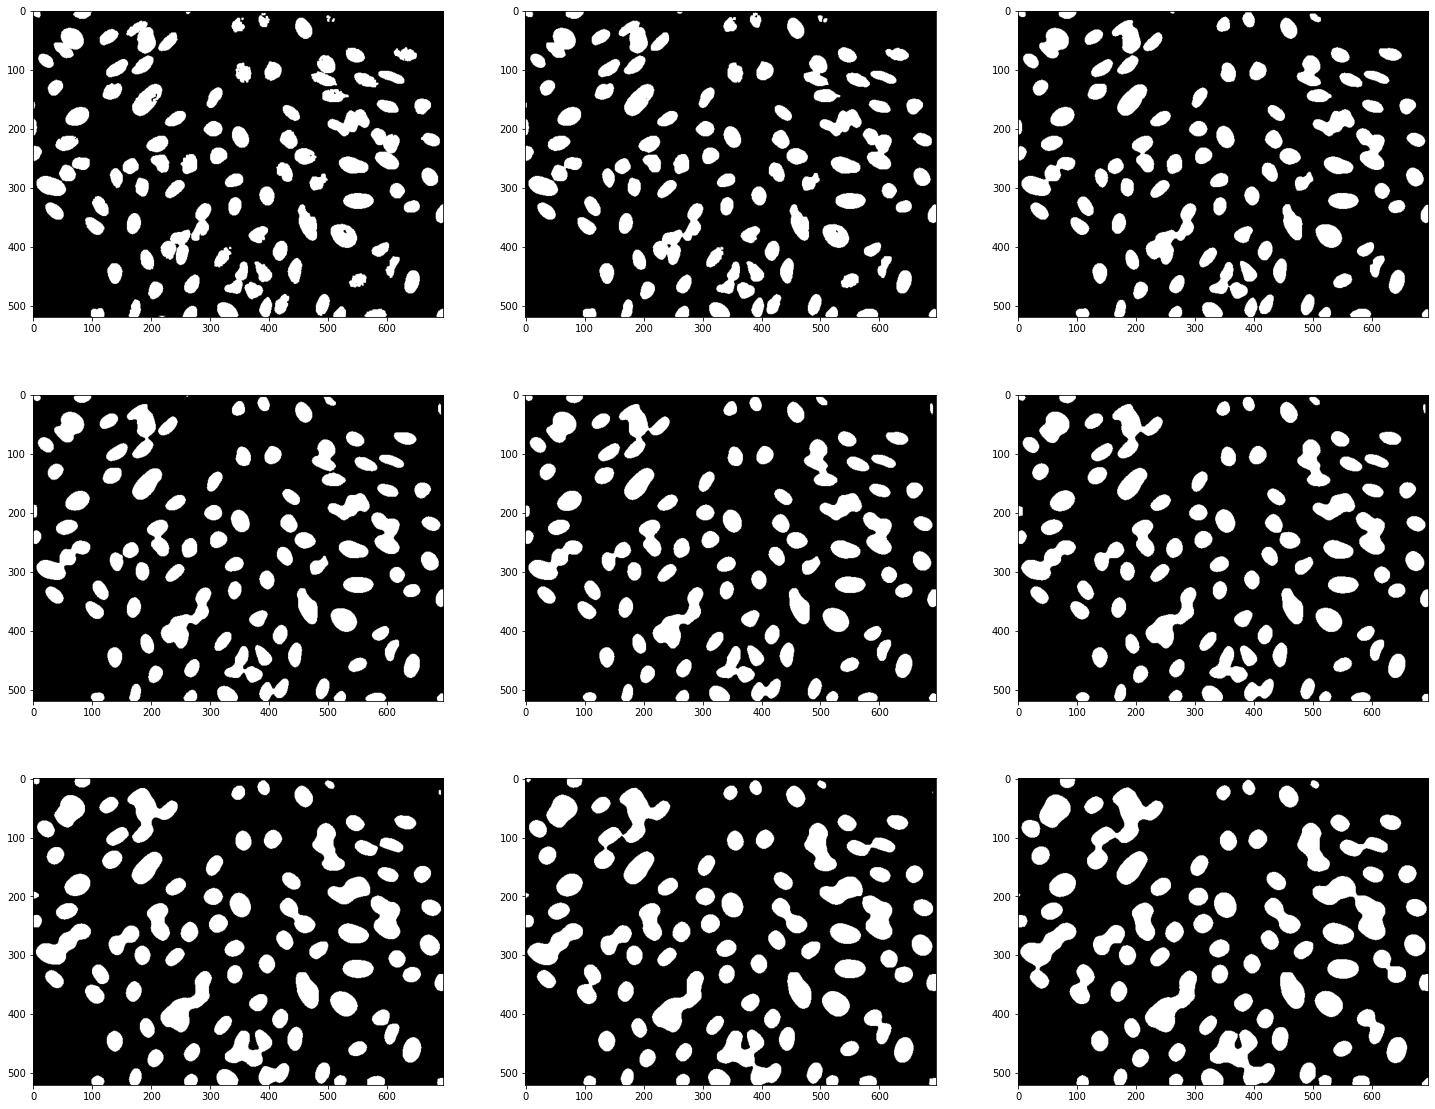

In [86]:
filters = []

std = 868.8
for kernel_size in [[3,3],[5,5],[9,9],[11,11],[13,13],[15,15],[19,19],[21,21],[23,23]]:
    filters += [gaussian_kernel(kernel_size, std)]

fig = plt.figure(figsize=(25, 20))
i=1
img = images[2]

for msk in filters:
    smooth_img = standardize(img, imgs_mean, imgs_std)
    smooth_img = correlation( smooth_img, msk )
    smooth_img = rescale(smooth_img, 0, 255)
    ret, t_img = cv.threshold(smooth_img.astype('uint8'), 0, 255, cv.THRESH_OTSU)
    fig.add_subplot(3, 3, i)
    plt.imshow(t_img, cmap='gray')
    i+=1

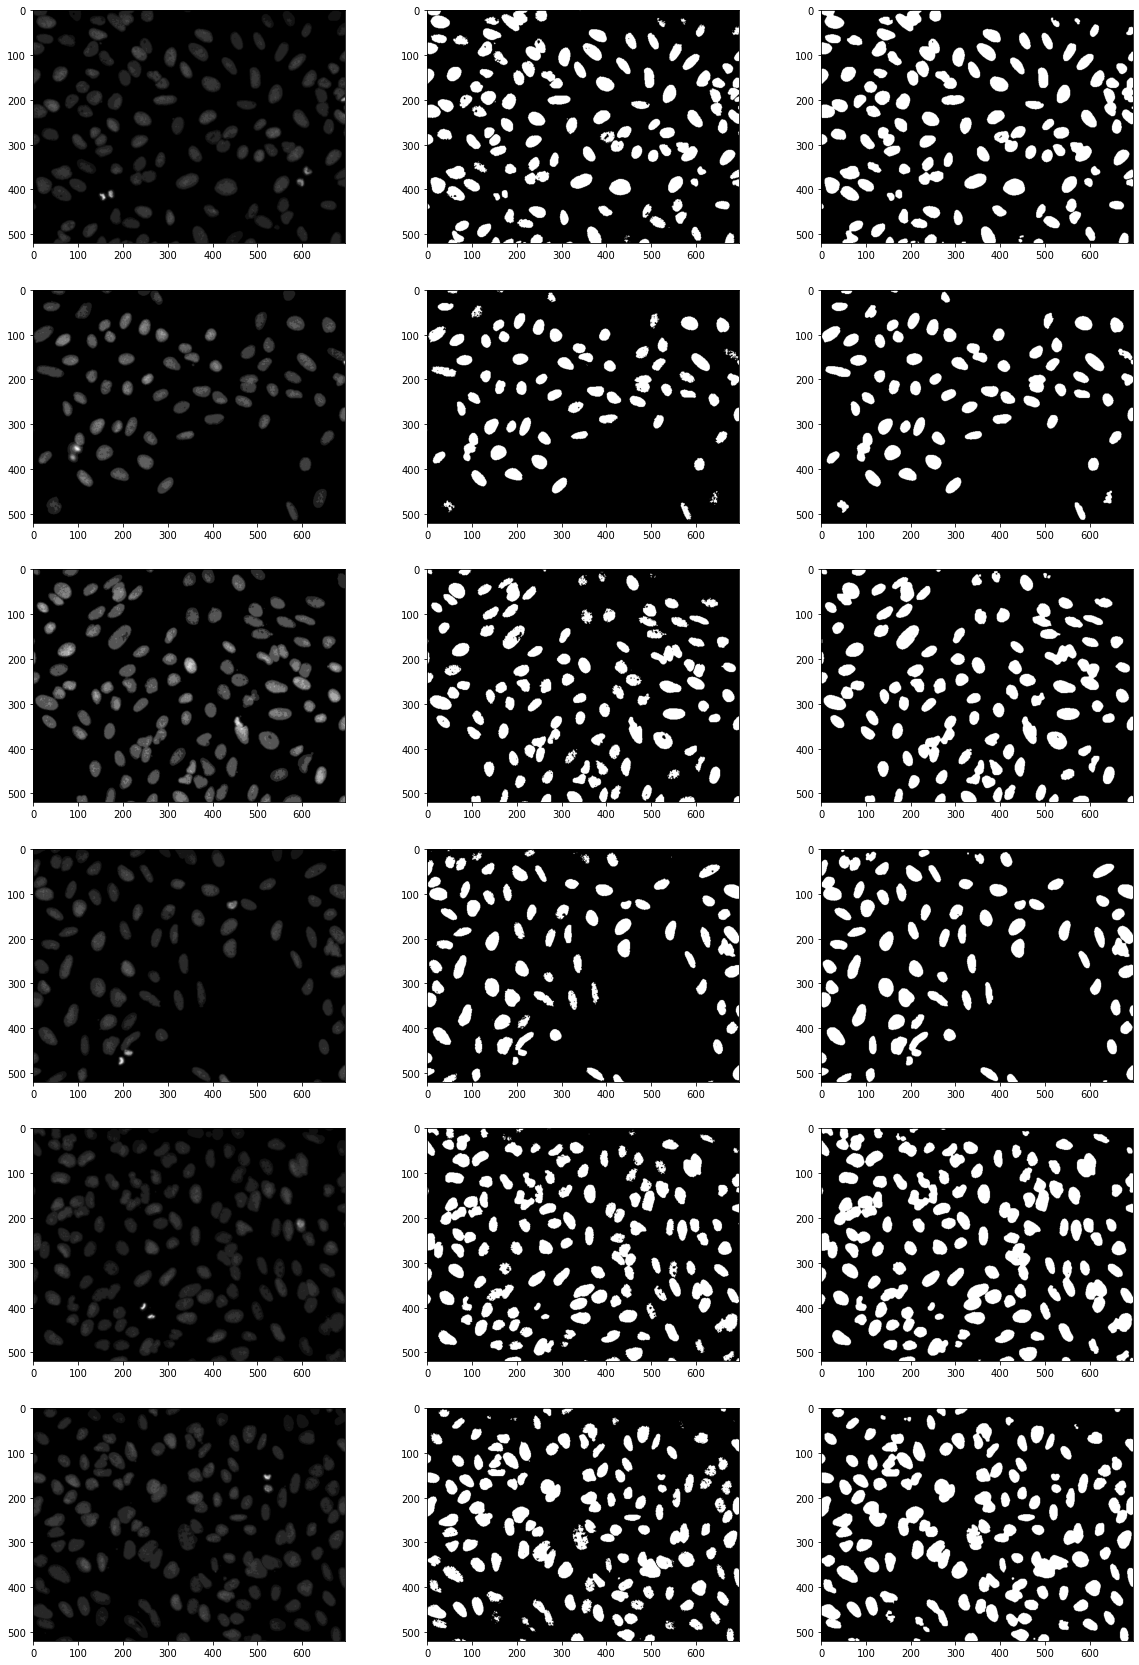

In [87]:
fig = plt.figure(figsize=(20, 30))
i=1
smooth_imgs = []
for img in images:
    
    img_s = standardize(img, imgs_mean, imgs_std)
    img_r = rescale(img_s, 0, 255).astype('uint8')
    
    fig.add_subplot(6, 3, i)
    plt.imshow(img_r, cmap='gray')
    i+=1
    
    ret, t_img = cv.threshold(img_r, 0, 255, cv.THRESH_OTSU)
    fig.add_subplot(6, 3, i)
    plt.imshow(t_img, cmap='gray')
    i+=1

    fig.add_subplot(6, 3, i)
    smooth_img = correlation(img_s, filters[1])
    smooth_img = rescale(smooth_img, 0, 255).astype('uint8')
    ret, t_simg = cv.threshold(smooth_img.astype('uint8'), 0, 255, cv.THRESH_OTSU)
    plt.imshow(t_simg, cmap='gray')
    i+=1

### Ex 3:

● Dada a base de imagens de células do exercício
anterior, tente realçar o núcleo e o contorno de cada
célula (Pode usar suavização também, em conjunto).

● Implemente um filtro de realce das direções dos
gradientes.

● Use a informação dos gradientes nas bordas mais
fortes para tentar estimar qual é a direção predominante
de gradientes na imagem toda.

● Estime a direção predominante em parte das imagens,
ou seja, dentro de regiões conexas. (opcional)

In [118]:
firts_derivative_kernel = ( [ [0, 1,0],
                               [0,-2,1],
                               [0, 0,0]] )

firts_derivative_y_kernel = np.array([[-1, 0,1],
                                      [-1, 0,1],
                                      [-1, 0,1]] )

firts_derivative_x_kernel = np.array([[ 1, 1, 1],
                                      [ 0, 0, 0],
                                      [-1,-1,-1]] )

laplacian_kernel = np.array( [ [-1, -1,-1],
                               [-1, 8,-1],
                               [-1,-1,-1]] )

In [90]:
imgs_contour = []
for img_path in os.listdir('BBBC022_v1_images_20585w1')[:6]:
    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    img = standardize(img, imgs_mean, imgs_std)
    img = correlation( img, filters[1] )
    contour = correlation(img, laplacian_kernel )
    imgs_contour += [contour]

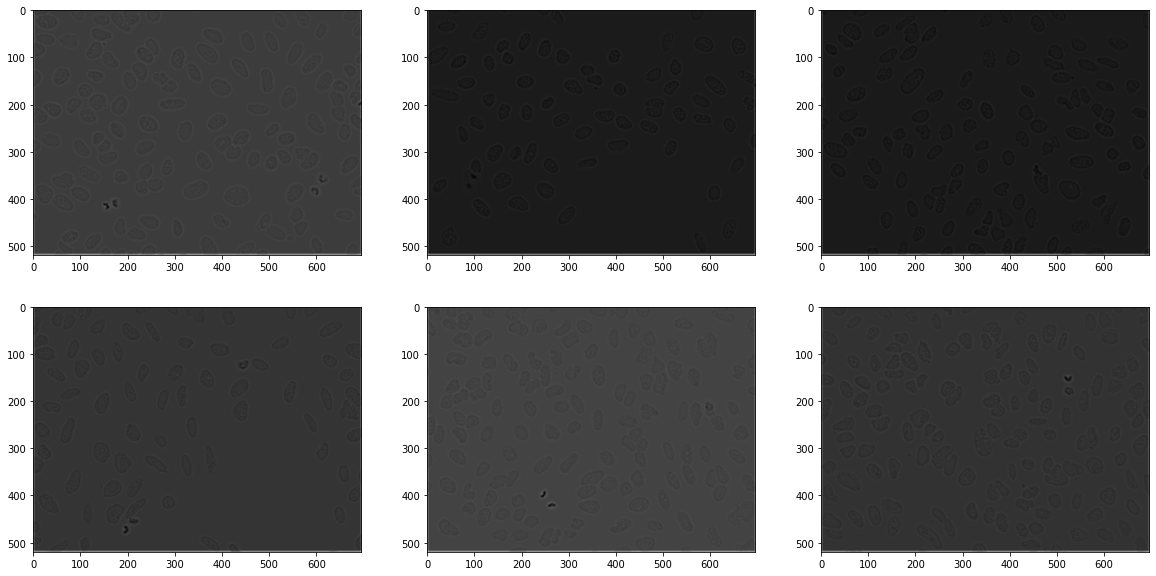

In [114]:
fig = plt.figure(figsize=(20, 10))
i=1
for contour in imgs_contour:
    fig.add_subplot(2, 3, i)
    plt.imshow(rescale(-contour,0,255).astype('uint8'), cmap='gray')
    i+=1

-0.4639537073940889 0.12132193302395124 0.10222423157033868 0.1809779434400996
-0.4639537073940889 -0.12951048429806597 -0.007933198900388759 0.11739122848827648
-0.4639537073940889 -0.2131212900720717 0.043839852162735775 0.1809779434400997
-0.4639537073940889 0.037711127249945506 -0.011459215573082623 0.1467389019574727
-0.4639537073940889 0.1631273359109541 -0.007933310837003636 0.1467389019574727
-0.4639537073940889 0.07951653013694837 -0.011018478904345005 0.1467389019574727


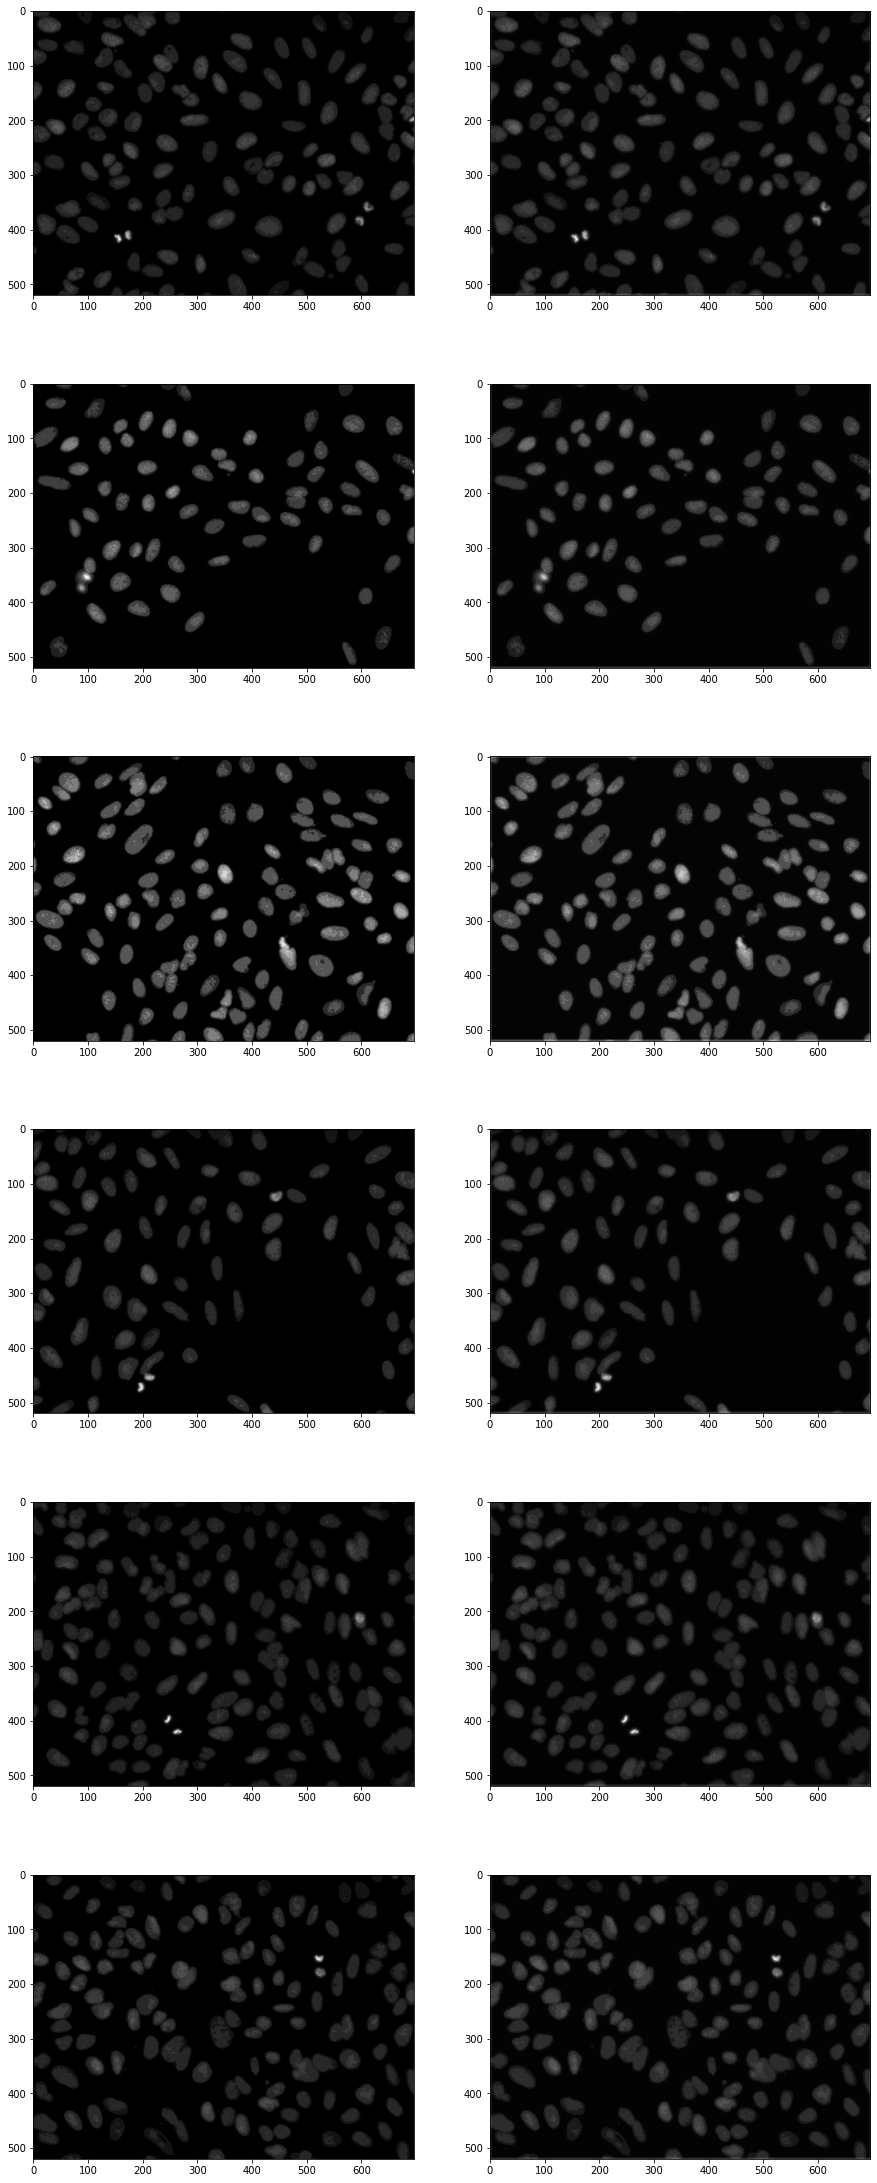

In [113]:
fig = plt.figure(figsize=(15, 40))
img_paths = os.listdir('BBBC022_v1_images_20585w1')
for i in range(len(imgs_contour)):
    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_paths[i]),0)
    img = standardize(img, imgs_mean, imgs_std)
    
    fig.add_subplot(6, 2, 2*i+1)
    plt.imshow(img, cmap='gray')
    
    c = -50000
    print(img.min(), img.max(), (c*contour[i]).min(), (c*contour[i]).max())
    
    fig.add_subplot(6, 2, 2*i+2)
    plt.imshow(c*imgs_contour[i] + img, cmap='gray')

In [123]:
x_grad = []
for img_path in os.listdir('BBBC022_v1_images_20585w1')[:1]:
    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    img = standardize(img, imgs_mean, imgs_std)
    img = correlation( img, filters[1] )
    img = correlation(img, firts_derivative_x_kernel )
    x_grad += [img]

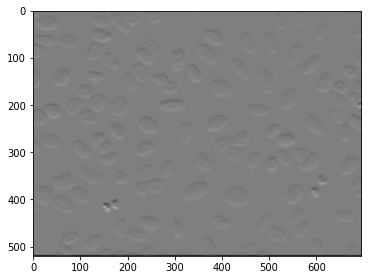

In [124]:
fig = plt.figure(figsize=(20, 10))
i=1
for g in x_grad:
    fig.add_subplot(2, 3, i)
    plt.imshow(rescale(g,0,255).astype('uint8'), cmap='gray')
    i+=1

In [125]:
y_grad = []
for img_path in os.listdir('BBBC022_v1_images_20585w1')[:1]:
    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    img = standardize(img, imgs_mean, imgs_std)
    img = correlation( img, filters[1] )
    img = correlation(img, firts_derivative_y_kernel )
    y_grad += [img]

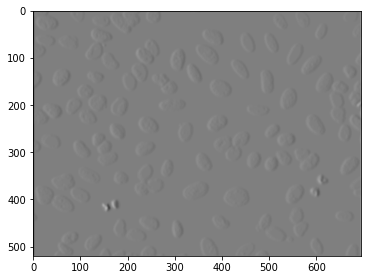

In [126]:
fig = plt.figure(figsize=(20, 10))
i=1
for g in y_grad:
    fig.add_subplot(2, 3, i)
    plt.imshow(rescale(g,0,255).astype('uint8'), cmap='gray')
    i+=1

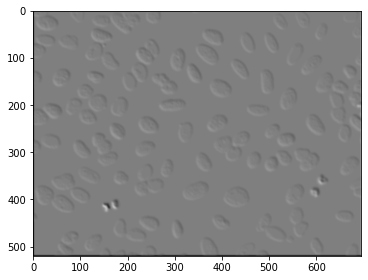

In [132]:
import math
fig = plt.figure(figsize=(20, 10))
for i in range(len(y_grad)):
    fig.add_subplot(2, 3, i+1)
    plt.imshow( rescale( (x_grad[i] + y_grad[i]) ,0,255).astype('uint8'), cmap='gray')